In [ ]:
####################   필터링   ##################  : 영상을 뭉갬, 부드럽게 만듬

# 주파수 공간에서의 필터링 (Frequency domain filtering) -> 주로 쓰는 방식은 아니나, 전혀 안쓰는건 아님
               
               
# 공간적 필터링 (Spatial domain filtering)      -> opencv에서 주로 활용하는 방식
#     • 영상의 픽셀 값을 직접 이용하는 필터링 방법
#     ▪ 대상 좌표의 픽셀 값과 주변 픽셀 값을 동시에 사용
#     • 주로 마스크(mask) 연산을 이용함, (마스크 = 커널(kernel) = 윈도우(window) = 템플릿(template))
#         -> 2단원에서 배웠던 ROI를 위한 마스크와는 조금 다른 개념
#     • CORRELATION 활용 (관용적으로 컨볼루션이라고도 부름)


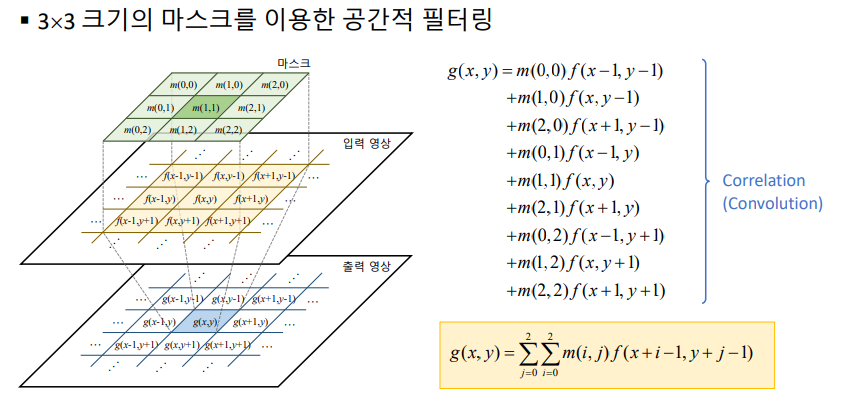


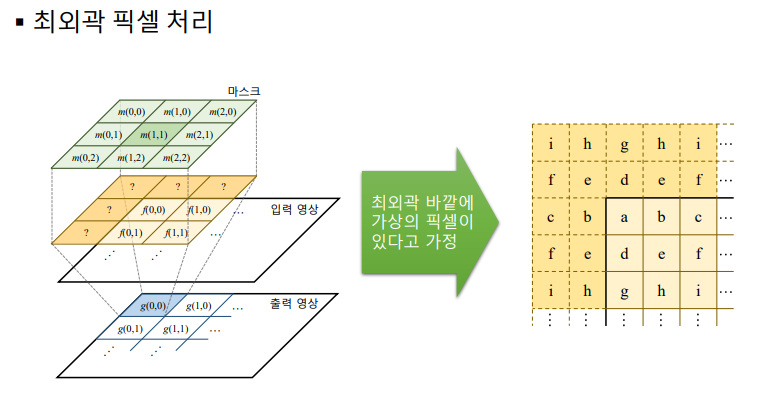

#             => BORDER_REFLECT_101을 가장 많이 사용함

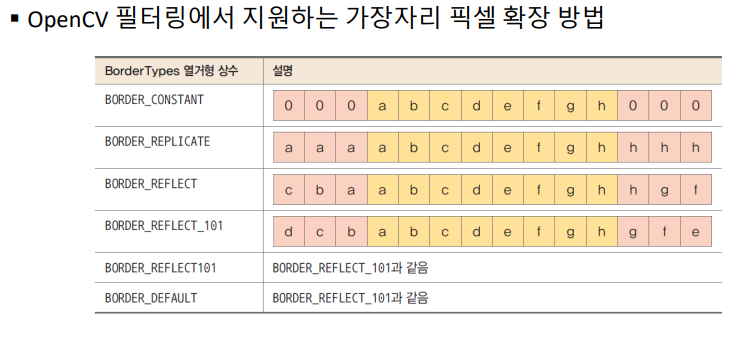

In [ ]:
######### 기본적인 2D 필터링 ##########

# cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None) -> dst
# • src: 입력 영상
# • ddepth: 출력 영상 데이터 타입. (e.g) cv2.CV_8U, cv2.CV_32F, cv2.CV_64F 등  -1을 지정하면 src와 같은 타입의 dst 영상 생성
# • kernel: 필터 마스크 행렬. 실수형.  -> 실수형 필요
# • anchor: 고정점 위치. (-1, -1)이면 필터 중앙을 고정점으로 사용, default : (-1, -1)
# • delta: 추가적으로 더할 값  -> default : 0
# • borderType: 가장자리 픽셀 확장 방식  -> default : BORDER_REFLECT_101
# • dst: 출력 영상


In [3]:
#########  평균 값 필터  #########   수식은 단순하나, 필터링 퀄리티는 낮음 (잘 안씀)

# 평균 값 필터(Mean filter)
# • 영상의 특정 좌표 값을 주변 픽셀 값들의 산술 평균으로 설정
# • 픽셀들 간의 그레이스케일 값 변화가 줄어들어 날카로운 에지가 무뎌지고, 영상에 있는 잡음의 영향이 사라지는 효과
# • 마스크 크기가 커질수록 평균 값 필터 결과가 더욱 부드러워짐(뭉개짐) → 그러나, 더 많은 연산량이 필요



import sys
import numpy as np
import cv2


src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

### 마스크 행렬 만들기 ###
kernel = np.ones((3, 3), dtype=np.float64) / 9.0  #  -> 마스크는 실수 타입이어야 하므로, 나누기 9.0으로 실행

### 기본 2D 필터링 실행 ### : cv2.filter2D(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None) -> dst
dst = cv2.filter2D(src, -1, kernel)


### 평균 필터 실행 ###
dst2 = cv2.blur(src, (3, 3))   # 위 두개를 한꺼번에 포함하여 실행해주는 코드 (평균 필터 코드)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.waitKey(5000)

cv2.destroyAllWindows()






import sys
import numpy as np
import cv2

src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

for ksize in (3, 5, 7):
    dst = cv2.blur(src, (ksize, ksize))  ## 3, 5, 7 사이즈별로 평균값 필터링

    desc = 'Mean: {}x{}'.format(ksize, ksize)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA) ## 사진에 문자열 넣기

    cv2.imshow('dst', dst)
    cv2.waitKey(5000)

cv2.destroyAllWindows()


## 평균 값 필터
## - 마스크를 이용하여 src의 코드값들을 동일한 가중치로 더한뒤, 나눈다 (즉, 평균)
## - 성능이 좋지 못함

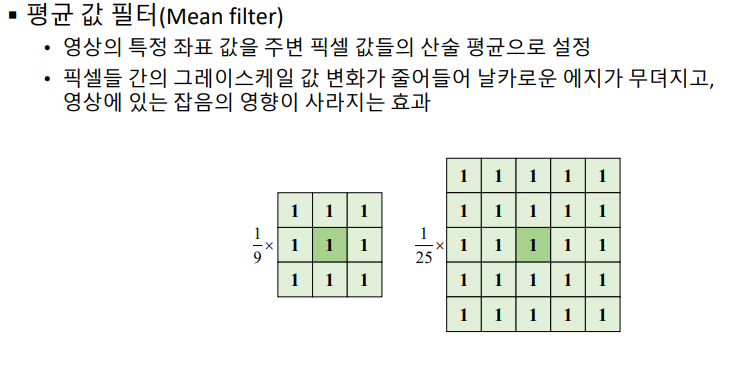

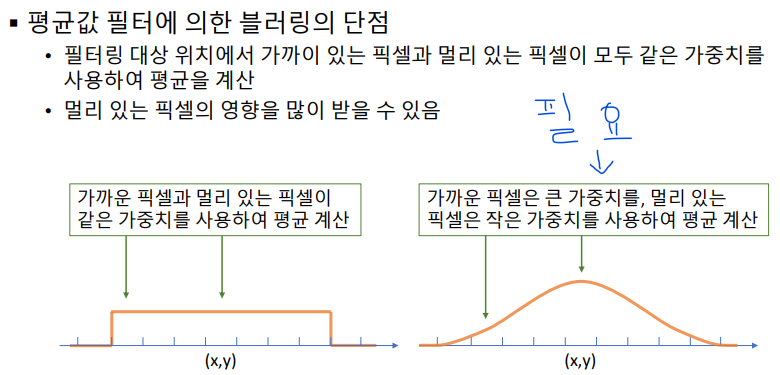

In [ ]:
#########  가우시안 필터  ######### 
# : 가우시안 함수를 활용하여, 가까운 픽셀은 큰 가중치를, 멀리있는 픽셀은 작은 가중치를 사용하여 평균 계산 (가중치 합과 유사)



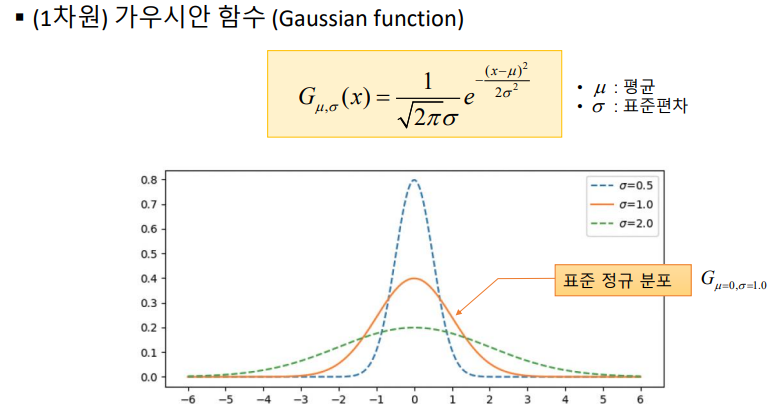

##  **2차원은 수식이 복잡하기때문에, 평균과 분산이 x/y축 모두 동일하다고 가정함.
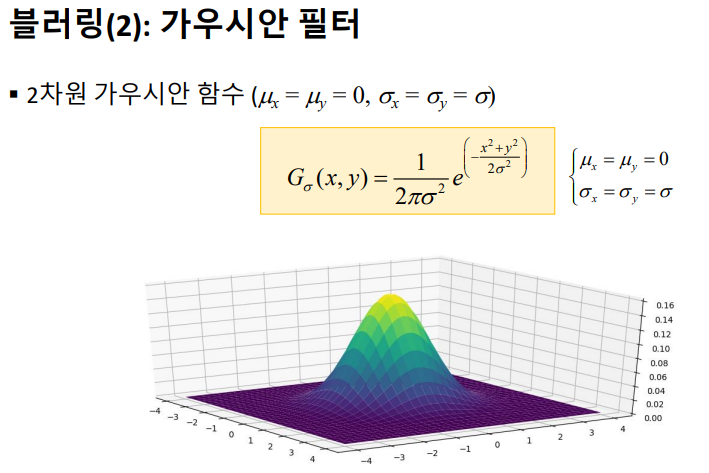

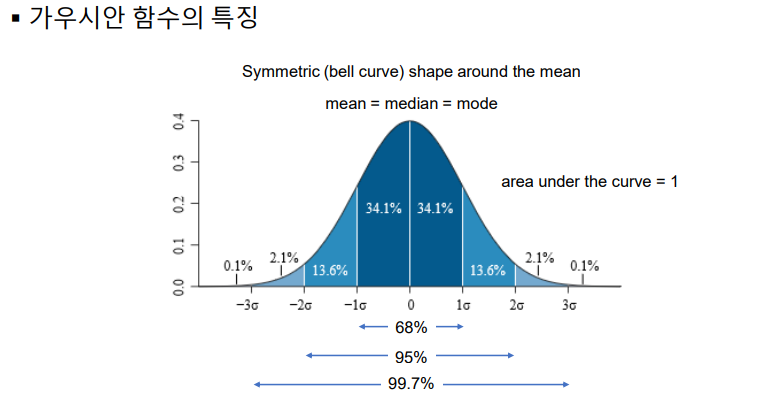

##   ** 6시그마 수준이라면, 6시그마 + 1(중앙 열)
##   ** 8시그마 수준이라면, 8시그마 + 1(중앙 열)가 마스크의 크기가 된다.
##   ** x, y축에서 둘다 먼 곳은 마스크의 값이 0임

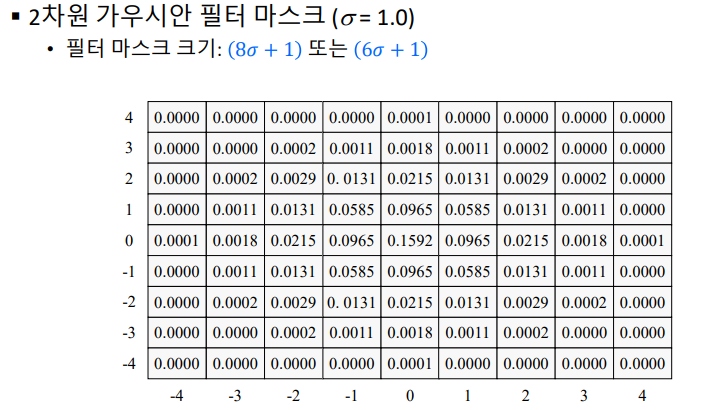

In [7]:
### 가우시안 필터링 함수 ###
# cv2.GaussianBlur(src, ksize, sigmaX, dst=None, sigmaY=None, borderType=None) -> dst
# • src: 입력 영상. 각 채널 별로 처리됨.
# • dst: 출력 영상. src와 같은 크기, 같은 타입.
# • ksize: 가우시안 커널 크기. (0, 0)을 지정하면 sigma 값에 의해 자동 결정됨. -> (0,0) 추천
# • sigmaX: x방향 sigma.   -> 시그마 값 입력
# • sigmaY: y방향 sigma. 0이면 sigmaX와 같게 설정.
# • borderType: 가장자리 픽셀 확장 방식.

import sys
import numpy as np
import cv2


src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

dst = cv2.GaussianBlur(src, (0, 0), 3)  ## 시그마 3일때, 3시그마는 9이므로 총 행렬의 크기는 18+1 = 19이다.
                                        ## 즉, 19X19 행렬을 마스크로 쓰므로, 연산량이 크다.
dst2 = cv2.blur(src, (7, 7))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.waitKey()

cv2.destroyAllWindows()


In [ ]:
################ 샤프닝 ###################   : 영상을 뚜렷하게 만듬

###  언샤프 마스크(Unsharp mask) 필터링  ###
#  : 날카롭지 않은(unsharp) 영상, 즉, 부드러워진 영상을 이용하여 날카로운 영상을 생성

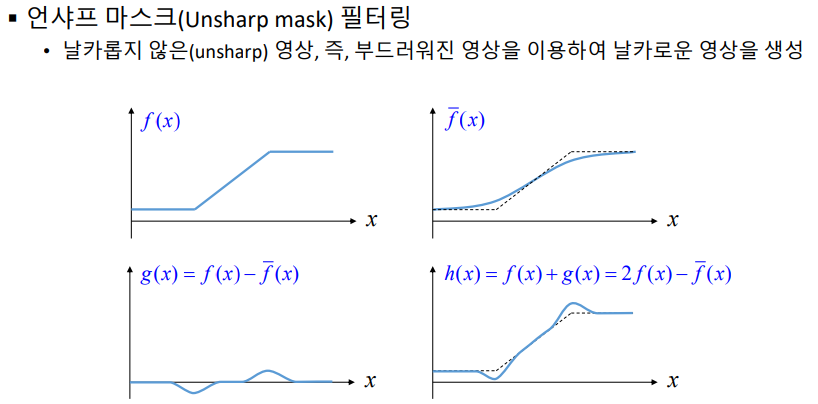

#            => f(x)에 g(x)를 더하여, 변화구간의 값 차이를 더 크게 만들어줌

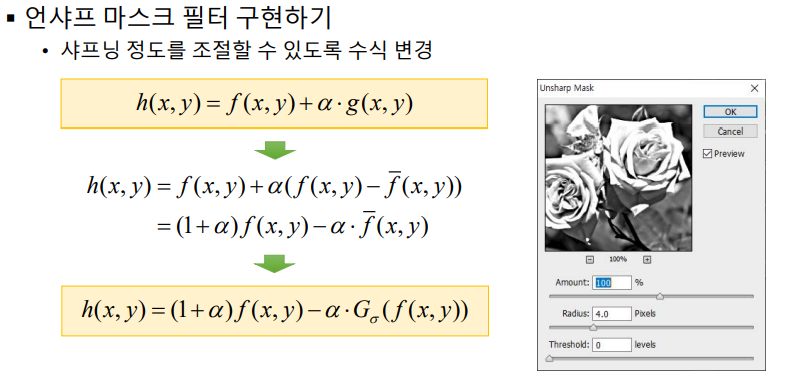

# => 알파 상수까지 더한 개념, GUI로 필터쓸때는 Amount가 알파와 동일

In [12]:
#### 언샤프 마스크(Unsharp mask) 필터링 ### : 함수가 따로 지원되지 않아, 직접 만들어야함.

### 그레이스케일에 대한 필터링 ###
import sys
import numpy as np
import cv2

src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

blr = cv2.GaussianBlur(src, (0, 0), 2)  ## f'(x), 즉 뭉개진 영상을 생성
dst = np.clip(2.0*src - blr, 0, 255).astype(np.uint8)  ##  언샤프닝 마스크 필터 구현, f(x) + g(x)  =  2f(x) - f'(x)
dst2 = cv2.addWeighted(src, 2 , blr, -1, 0)  ## 또다른 언샤프닝 마스크 필터 구현 방법


cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.waitKey(10000)

cv2.destroyAllWindows()


### 컬러영상에 대한 필터링 ###
import sys
import numpy as np
import cv2

src = cv2.imread('rose.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

src_f = src_ycrcb[:, :, 0].astype(np.float32)
blr = cv2.GaussianBlur(src_f, (0, 0), 2.0)
src_ycrcb[:, :, 0] = np.clip(2. * src_f - blr, 0, 255).astype(np.uint8)

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

In [15]:
### 컬러영상에 대한 필터링 ###
import sys
import numpy as np
import cv2

src = cv2.imread('rose.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)  ## 컬러 영상의 경우, 샤프닝시 밝기 정도만 높낮이의 차를 크게함.
                                                    ## 따라서, YCrCb로 변경후, Y(밝기)에 대해서만 필터를 통과시킴

src_f = src_ycrcb[:, :, 0].astype(np.float32)
blr = cv2.GaussianBlur(src_f, (0, 0), 2.0)
src_ycrcb[:, :, 0] = np.clip(2. * src_f - blr, 0, 255).astype(np.uint8)

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

In [21]:
################  잡읍 (Noise) 필터링  ##############
# : 영상의 픽셀 값에 추가되어 있는 원치 않는 형태의 신호
#  - 잡음의 종류 : 가우시안 잡음(평균 0인 표준 정규분포의 잡음)
#                  소금-후추 잡음 (min, max 값이 껴있는 잡음 - 예를 들어 픽셀값이 0, 255가 껴있음), 요새는 잘 없는 잡음



In [22]:
### 미디언 필터 ###   
# : 소금-후추 잡음 제거에 효과적(min, max 값을 중앙값으로 대체하므로), 단 영상 퀄리티는 좋게 필터링되지 않음 (잘 않씀)
# cv2.medianBlur(src, ksize, dst=None) -> dst
#  - ksize: 커널 크기. 1보다 큰 홀수를 지정 (아래 그림 참고)

import sys
import numpy as np
import cv2

src = cv2.imread('noise.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.medianBlur(src, 3)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()

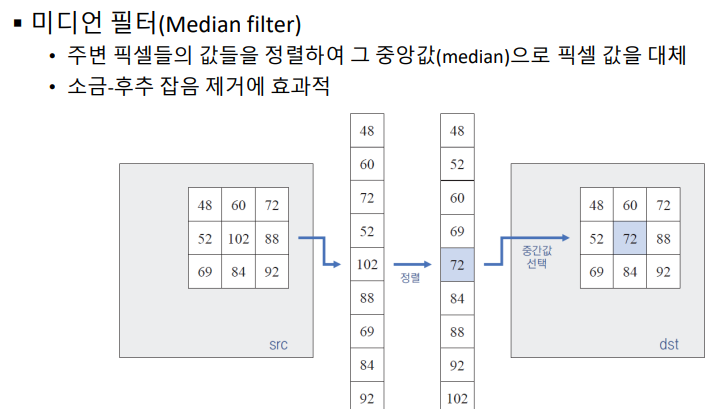

In [ ]:
### 양방향 필터 ###

# 가우시안 잡음 제거에는 가우시안 필터가 효과적이나, edge 정보가 많이 희석될수 있다.(영상이 뭉개질수있다.)
# 이러한 단점을 보완하여, 가우시안 잡음은 제거하고, edge 정보는 살리는 필터가 양방향 필터이다.


# 양방향 필터(Bilateral filter)
#  • 에지 보전 잡음 제거 필터(edge-preserving noise removal filter)의 하나
#  • 평균 값 필터 또는 가우시안 필터는 에지 부근에서도 픽셀 값을 평탄하게 만드는 단점이 있음
#  • 기준 픽셀과 이웃 픽셀과의 거리, 그리고 픽셀 값의 차이를 함께 고려하여 블러링 정도를 조절


## * 양방향 필터 수식
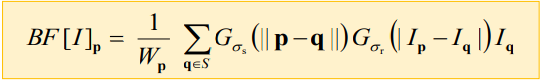



# 양방향 필터에 대한 이해     
전형적인 가우시안 스무딩은 실제 영상의 픽셀값이 공간 상에서 천천히 변화하고, 
이로 인하여 이웃 픽셀과 연관성을 많이 갖고 있지만
잡음은 갑작스럽게 값이 튄다는 점에서 착안되었다.(즉, 잡음은 공간적으로 연관성이 적다.)
이러한 이유로 가우시안 스무딩은 신호는 보존하면서 잡음만 제거한다.

그러나 이 방법은 엣지 근처에서는 문제가 발생한다.
주변 값들과 상관성이 적은 엣지 부근에서도 가우시안 스무딩은 영상을 평탄하게 만듦으로써 엣지를 없애버린다.

양방향 필터는 약간의 연산 시간을 더 소모하지만 엣지를 보존하면서 영상의 스무딩을 수행한다.
가우시안 스무딩과 유사하게 양방향 필터 또한 각 픽셀과 주변 요소들로부터 가중 평균을 구한다.

이 때 가중치는 두 개의 성분을 갖는데, 하나는 가우시안 스무딩에서 사용되는 가중치와 동일하다.
나머지 가중치 성분도 가우시안 가중치와 유사하지만 중심으로부터의 거리에 의해 결정되는 값이 아니라 
중심 픽셀값과의 밝기 차이에 의해 결정되는 가중치를 사용한다.

즉, 양방향 필터는 유사한 픽셀에 대하여 더 큰 가중치를 부여하는 가우시안 스무딩이라고 간주할 수 있다.

이 필터는 영상을 마치 수채화 그림처럼 바꿔주는 효과가 있다. 양방향 필터는 영상 분할을 위한 전처리 과정으로 사용되기도 한다.

양방향 필터는 두 개의 매개변수를 사용한다.
param1은 색 공간에서 사용되는 가우시안 커널의 크기를 나타낸다.
param1 값이 클수록 더 넓은 분포의 밝기값(또는 색상값)이 평탄화된다. (또한 그 결과로 더욱 극심한 불연속점이 생긴다.)

param2는 공간 영역에서 사용되는 가우시안 커널의 너비를 나타낸다.
이는 가우시안 필터에서 시그마값과 유사하다.

http://kimjuyoung.blogspot.com/2016/02/bilateral-filter.html

In [6]:
# cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, dst=None, borderType=None) -> dst
# • src: 입력영상. 8비트또는실수형, 1채널또는 3채널. 
# • d: 필터링에사용될이웃픽셀의거리(지름). 음수(-1)를 입력하면 sigmaSpace 값에의해자동결정됨. 
# • sigmaColor: 색공간에서필터의표준편차  ,  컬러가 어느 수준까지는 유사하고, 어느 수준부터는 Edge라고 판단할지를 가르는 기준값
# • sigmaSpace: 좌표공간에서필터의표준편차 
# • dst: 출력영상. src와같은크기, 같은타입. 
# • borderType: 가장자리픽셀처리방식

import sys
import numpy as np
import cv2

src = cv2.imread('lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

dst2 = cv2.bilateralFilter(src, -1, 10, 5)
dst = cv2.bilateralFilter(src, -1, 5, 5)
dst3 = cv2.bilateralFilter(src, -1, 15, 5)
dst4 = cv2.bilateralFilter(src, -1, 15, 25)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)
cv2.waitKey()

cv2.destroyAllWindows()

In [ ]:
# 카툰 필터 카메라

import sys
import numpy as np
import cv2


def cartoon_filter(img):
    h, w = img.shape[:2]
    img2 = cv2.resize(img, (w//2, h//2))

    blr = cv2.bilateralFilter(img2, -1, 20, 7)
    edge = 255 - cv2.Canny(img2, 80, 120)
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

    dst = cv2.bitwise_and(blr, edge)
    dst = cv2.resize(dst, (w, h), interpolation=cv2.INTER_NEAREST)

    return dst


def pencil_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blr = cv2.GaussianBlur(gray, (0, 0), 3)
    dst = cv2.divide(gray, blr, scale=255)
    return dst


cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed!')
    sys.exit()

cam_mode = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    if cam_mode == 1:
        frame = cartoon_filter(frame)
    elif cam_mode == 2:
        frame = pencil_sketch(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)

    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)

    if key == 27:
        break
    elif key == ord(' '):
        cam_mode += 1
        if cam_mode == 3:
            cam_mode = 0


cap.release()
cv2.destroyAllWindows()
